# Week 5: Introduction to Machine Learning 
# Tutorial Module

This week will introduce you to basic fundamental machine learning concepts. In the pre-module, you have been introduced to what machine learning is, and hopefully are motivated to learn more about how it works. Today, we will break down the stages in the ML pipeline so you can get a sense of what the input/outputs are to each stage. We will first explain key parts of data preparation, including data cleaning, feature selection, and data splitting, then give a glimpse of model training and evaluation, which will be covered in weeks 6 and 7, respectively. Understanding the pipeline at a high level will serve as a solid foundation before we delve into details on the inner workings of each stage in weeks 6 and 7. 

## Learning Objectives

In this module, you will learn:
1. What a typical ML pipeline looks like, from beginning to end
    * What kind of data/information flow between stages
2. Data Preparation
    * Data cleaning
    * Feature selection
    * Data splitting
3. A conceptual view of model training
4. A conceptual view of model evaluation

In [2]:
import sys
print(sys.executable)  # This will show the Python executable path

import pandas as pd
print(pd.__version__)  # This will confirm the version of pandas


c:\Users\Emily\Envs\django_environment_person_website\Scripts\python.exe
2.2.3


In [3]:
!pip install pandas seaborn numpy scikit-learn

### scikit-learn
Scikit-learn is a Python library for machine learning tools and models. We will be importing this library, along with some familiar libraries that you have already learned about, in the setup cell below. As we go through each topic in the coming weeks, we will explain more about the key functions that this library provides.

Run the setup cell below, and the raw dataset we will be working with, as well as the dirtified dataset that you will use to practice cleaning. 

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np

# machine learning
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

df_dirty = pd.read_csv('bc_data_dirtified.csv', index_col=0)
df_dirty.head()

print(f"Shape of original dirty dataset: {df_dirty.shape}")

df = pd.read_csv('bc_data.csv', index_col=0)
df = df.drop('Unnamed: 32', axis=1)
df.head()
print(f"Shape of original dataset: {df.shape}")

Shape of original dirty dataset: (626, 32)
Shape of original dataset: (626, 32)


### Recap of pipeline 
Recall the pipeline diagram from the Pre-Module: 

<img src="ml_pipeline.png" alt="Drawing" style="width: 800px;"/>

This week, we would like to focus on the input and output of each stage so you can start to understand how it all fits together. 

Let's get started with the first stage, data preparation.

### Data preparation

![dp](data_prep_pipeline.png)

Like with all data science and machine learning tasks, we have to start with the dataset. Depending on the context, researchers may conduct data collection themselves. We will be using a public dataset of breast cancer patients, found on https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic. 

This raw dataset is the input to the data preparation stage. After some data manipulation, we should have datasets in a format that is usable for the next stage, which is model training.

#### **Data cleaning**
Our results are heavily affected by the quality and quantity of our data. You are already familiar with data loading and cleaning from week 3; for this module, you are presented with "dirtified" data. Apply the method learnt in week 3 on this dataset. We will also introduce new processing technieques. 

In this dataset, there is a redundant column called 'Unnamed' which has no information; we will drop this. As well, the 'diagnosis' column currently has letters 'B' or 'M'; we will convert these to 0 for benign and 1 for malignant.

While we're at it, let's separate the predictor variables and the target variable (benign/malignant), as we learned in week 3 for the heart failure dataset. We do the same thing here, and assign ```x = predictor vars``` and ```y = target var```. 

<span style="background-color: #FFD700">**Run the code below to perform data cleaning and save the predictor/target variables in ```x``` and ```y```:**</span>

In [53]:
# Data cleaning
# remove the 'Unnamed: 32' column
df_dirty = df_dirty.drop('Unnamed: 32', axis=1)


**Q1. Display the dataset. List 2 aspects that should be processed for the dataset and why?**

In [54]:
df_dirty

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
84358402.0,M,NaN,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810158.0,B,13.11,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.05102,0.1850,...,14.55,29.16,99.48,639.3,0.1349,0.4402,0.3162,0.11260,0.4128,0.10760
918192.0,B,13.94,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.06615,0.1976,...,14.62,15.38,94.52,653.3,0.1394,0.1364,0.1559,0.10150,0.2160,0.07253
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="background-color: #FFD700">**Write your answer below**</span>

1. There are rows that contain NaN values. These should be processed since the NaN values do not represent the dataset.
2. The "diagnosis" column contains "WrongValue" which is inconsistent with the classes "B" and "M"
3. The "diagnosis" column should also be one-hot encoded as either 0 or 1 ("B" or "M") 

### New Data Cleaning Steps
   1. **Fixing inconsistent formatting**: Ensuring consistency in date formats, capitalization, or spelling.
      - **Null value imputation**: Filling missing values using strategies like mean, median, mode, forward fill, backward fill, or even predictive models.
      - **Removing rows or columns**: In some cases, dropping rows or columns with excessive nulls might be appropriate.
   3. **Delete Duplicate rows**: Duplicate row detection and removal

Step 1: Fixing inconsistent formatting.

NOTE: For feature columns with inconsistent values (such as NaN), some techniques can be used, such as replacing with an average value or mean. The choice of replacement depends on the nature of the feature and needs to be carefully considered to prevent unrepresentative data. For our dataset and for simplification, we will remove the rows with NaN values.

Let's analyze our data to see if we have any NULL/NaN values and which rows have NaN and how many.

In [58]:
# count how many NaN values for each column
nan_count = df_dirty.isnull().sum()
nan_count


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Q2. Remove the columns with NA values. Print the shape of the dataset before and after removal. How many rows were removed?**

>Hint: refer to Week 3

<span style="background-color: #FFD700">**Write your code below**</span> 


In [56]:
# YOUR CODE HERE
print(f"Shape of dirty dataset before step 1: {df_dirty.shape}")
df_dirty = df_dirty.dropna(axis=0)
print(f"Shape of dirty dataset after step 1: {df_dirty.shape}")
df_dirty

Shape of dirty dataset before step 1: (626, 31)
Shape of dirty dataset after step 1: (587, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
843786.0,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
844359.0,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853401.0,M,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.12440,0.2183,...,23.15,34.01,160.50,1670.0,0.1491,0.4257,0.6133,0.18480,0.3444,0.09782
8810158.0,B,13.11,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.05102,0.1850,...,14.55,29.16,99.48,639.3,0.1349,0.4402,0.3162,0.11260,0.4128,0.10760
918192.0,B,13.94,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.06615,0.1976,...,14.62,15.38,94.52,653.3,0.1394,0.1364,0.1559,0.10150,0.2160,0.07253


<span style="background-color: #FFD700">**Write your answer below**</span>

---

You might have noticed that the dirtified dataset also has an inconsistent value "WrongValue" in the "diagnosis" column. Since this column is the classification column, we need to remove these incorrect entries.

**Q3. Remove the rows where the classification column "diagnosis" is not equal to "M" or "B". Print the shape before and after removal.**

>Hint: refer to the documentation for [isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)

<span style="background-color: #FFD700">**Write your code below**</span> 


In [57]:
# YOUR CODE HERE

print(f"Shape of dirty dataset before step 1: {df_dirty.shape}")
df_dirty = df_dirty[df_dirty['diagnosis'].isin(["M", "B"])]
print(f"Shape of dirty dataset after step 1: {df_dirty.shape}")
df_dirty

Shape of dirty dataset before step 1: (587, 31)
Shape of dirty dataset after step 1: (582, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
843786.0,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.17910,0.5249,0.5355,0.17410,0.3985,0.12440
844359.0,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.14420,0.2576,0.3784,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8912284.0,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,0.1432,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.10170,0.1999,0.07127
853401.0,M,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.12440,0.2183,...,23.15,34.01,160.50,1670.0,0.14910,0.4257,0.6133,0.18480,0.3444,0.09782
8810158.0,B,13.11,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.05102,0.1850,...,14.55,29.16,99.48,639.3,0.13490,0.4402,0.3162,0.11260,0.4128,0.10760


### Data Exploration - Feature Selection

![de](data_explore_pipeline.png)

The breast cancer dataset we are working with has 32 features, but not all of the features may be useful in our analysis. Sometimes it is advantageous to do a quick analysis of which features we are going to keep: this is called feature selection. This is not a mandatory step, and we will often use all the features available to us, but it can help reduce the training time significantly for very large datasets. 

There are several different metrics we can use to choose which features to keep. For our analysis, we will look for correlated features and remove some if we see multicollinearity.

 <span style="background-color: #AFEEEE">**Multicollinearity**</span>: when multiple independent variables are highly correlated with one another, with correlation coefficients near -1 or 1.

The idea is that if two features A and B are highly correlated, we'll have a hard time knowing if the outcome is impacted by A because A has some real significance, or if it is just because A is correlated to B. We will use a heatmap similar to the one in week 3 to visually detect multicollinearity.

**Run the code below .**

In [ ]:
# extract x (features) and y (classes) values
# - instead of the cleaned df_dirty from the previous exercises, we will use df, which is the cleaned dataset to achieve consistent results across students

# encode target feature to binary class and split target/predictor vars
y = df["diagnosis"].map({"B" : 0, "M" : 1})
x = df.drop("diagnosis", axis = 1)

x

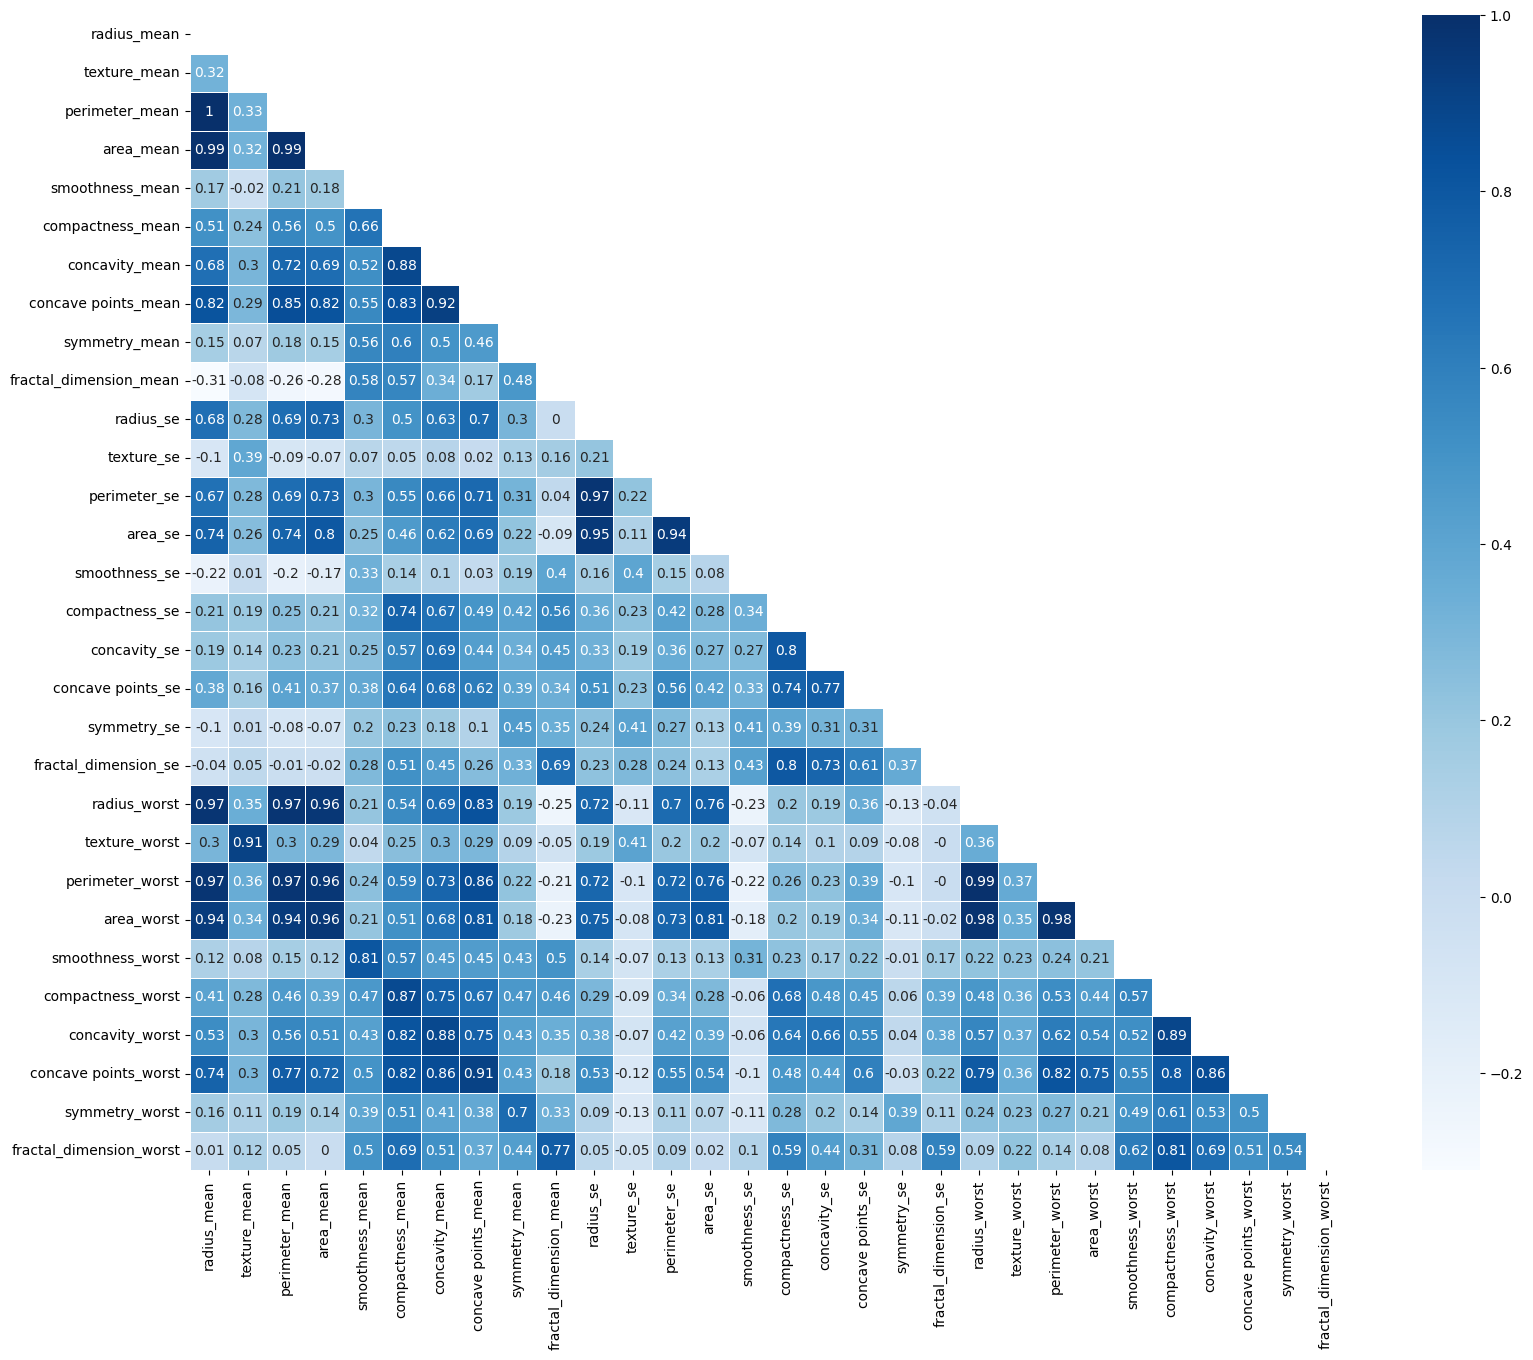

In [16]:
# Feature selection
# correlation matrix
corr = x.corr().round(2)

# remove upper triangle half, redundant as data is mirrored
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# generate heatmap
heatmap = sns.heatmap(corr, annot=True, mask=mask, cmap='Blues', square=True, linewidths=.5, xticklabels=1, yticklabels=1)

# Resize the plot for better viewing
heatmap.figure.set_figwidth(20)
heatmap.figure.set_figheight(15)

 **Q4. Looking at the heatmap above， what are the top 3 features highly correlated with `radius_worst`?**

 <span style="background-color: #FFD700">**Write your answer below**</span>

 Answer: radius_mean, perimeter_mean, area_mean

It seems like all the radius, perimeter, and area features are highly correlated (correlation coeffs > 0.8). This makes sense logically, because they are mathematically related: Assuming a cancer cell can be approximated by a circle, area = pi * radius^2, and perimeter = 2 * pi * radius. When radius increases, so does area and perimeter. All of these features are talking about the size of the cancer cell. We should pick just one of these features to keep- we will pick radius.

Also, notice that all the "mean" features are highly correlated with "worst" features. In the dataset description* it says "The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image". In other words, for the radius measurements, the person responsible for data collection took 10 radius measurements around the cell image (because it is not a perfect circle) and took the mean of all 10 as well as the mean of the largest/worst 3. This means that the "worst" values have a mathematical relationship to "mean" values. Let's drop all worst columns, and continue with the mean for our analysis.

*https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [17]:
# drop all "worst" columns
cols = ['radius_worst',
        'texture_worst',
        'perimeter_worst',
        'area_worst',
        'smoothness_worst',
        'compactness_worst',
        'concavity_worst',
        'concave points_worst',
        'symmetry_worst',
        'fractal_dimension_worst']
x = x.drop(cols, axis=1)

# drop perimeter and area (keep radius)
cols = ['perimeter_mean',
        'perimeter_se',
        'area_mean',
        'area_se']
x = x.drop(cols, axis=1)

# verify remaining columns
x.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

### Data splitting
Conceptually, we want to be able to train the model in the next stage of our pipeline and then test how well the model generates predictions in the final stage. Right now, we have one big dataset with 569 patients. Can we use this single dataset to both train and test the model?

Think of the training stage like studying for an exam, where you complete practice problems and look at the answer key to learn from your mistakes. Following that analogy, model prediction would be like taking your actual exam and writing your answers in the exam sheet.

Let's continue with this analogy for a second. When you sit down in the exam room and open your test, you will see problems that have not shown up in the problem sets that your professor has posted on Quercus. This is deliberate because only students who really understood the concepts will be able to apply their knowledge to new problems. In other words, we don't want to test someone using the same questions that they have seen before, because they would simply memorize the answers- they might score 100% on the exam, but they haven't really learned. The same concern applies to machine learning models. If we want to test how good a model is after training, we need to feed it **new** inputs that it has never seen before. 

It's becoming clear that we cannot use the same dataset for both training and testing. What should we do? We can't go out and collect another dataset just for testing, due to time and resource constraints. A much simpler and effective solution is to split the dataset into a **training set** and a **test set**.

<img src="data_splitting.png" alt="Drawing" style="width: 600px;"/>

It is up to you how much of the data will be allocated to each set, but usually around 70-80% of the data will be allocated to the training set. Note that there is a greater proportion of data in the training set, because we want our model to learn as best as possible. At the same time, we want to keep a decent amount of hold-out data so that our testing is representative of the real-world scenario and covers a wide range of possible inputs. There is a tradeoff between the size of the train and hold-out sets, with no magic number that works best for all problems. 

To split the dataset, we will use the `train_test_split()` function in scikit-learn.

| Function | Input Parameters | Output | Syntax |
| --- | --- | --- | --- |
| train_test_split() | x, y, test_size, random_state | x_train, x_test, y_train, y_test | train_test_split(x, y, test_size, random_state) |

Input parameters:
* x: a pandas DataFrame of the feature columns.
* y: a pandas Series of the outcome column.
* test_size: a decimal number between 0 and 1; the fraction of the dataset you wish to set as the test set. 
* random_state: any random number; this determines how the dataset is shuffled before splitting. Call the function with the same number if you want to shuffle it the same way (for reproducing the same split datasets every time)

**Run the code below to split into 4 sets of data: ```x_train```, ```y_train```, ```x_test```, ```y_test```.**

In [18]:
# Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

x.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,,,,
842302,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [19]:
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")

print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (455, 16)
y_train: (455,)
x_test: (114, 16)
y_test: (114,)


Look at the shapes printed above. These tell us the dimension of the datasets, in the form (rows, col). For example, a matrix with 2 rows and 3 columns would have a shape of (2,3).

The original dataset before cleaning and splitting had a shape of (569, 32), meaning there were 569 samples and 32 features.

<span style="background-color: #FFD700">**Answer the following questions:**</span>

**Q5. How many features were removed through data cleaning & feature selection?**
* Answer: 32 - 16 = 16 features removed

**Q6. How many samples are there in the training set?**
* Answer: 455

**Q7. How many samples are there in the test set?**
* Answer: 114

**Q8. What is the train-test split ratio?**
* Answer: 80-20 (80% and 20%)

### Model training

![mt](model_train_pipeline.png)

Next, we can train our model to learn from the dataset.

A **model** in machine learning is an **algorithm** that calculates an output based on input(s) from a dataset. A model has **weights** that affect the calculation of the output, which can be updated during training. 

<span style="background-color: #AFEEEE">**Model**</span>: an algorithm that calculates an output based on input(s) from a dataset and its current weights.

<span style="background-color: #AFEEEE">**Algorithm**</span>: a set of procedures to follow to compute some output or result. We can describe an algorithm in plain English (take x and multiply it by a, then add b. Save this result in y). Algorithms in this context are translatable to something a computer can understand - for example, the code we write.

<span style="background-color: #AFEEEE">**Weights**</span>: the learnable parameters of a model. For example, the coefficient a in y = a\*x + b could be a weight if a\*x + b is the model.

We will be using logistic regression as the model in our analysis, which is capable of generating classifications (i.e., benign or malignant). 
The input to this stage is the training set, with the features (input 'x' in the diagram below) and the **true labels** (output 'y').

<span style="background-color: #AFEEEE">**True label**</span>: the actual outcome for a sample in the dataset. This is what the model would predict for a particular sample if it was (hypothetically) 100% accurate. In our case, the true labels are benign/malignant for each patient.

<img src="model_train_system.png" alt="Drawing" style="width: 800px;"/>


The type of model training we describe is an **iterative** process. At each iteration, we do two things: update the weights and evaluate the updated weights by checking what the actual outcome was for that data point. We do this for every chunk of our dataset until we get through the entire training set.

**High-level model training steps:**
1. The model starts with some default/random weights. Think of this part as an initial state, like your brain when you walk into your first class of the semester.
2. We pass in an input x from the training set. The model performs calculations based on x and its weights to produce a prediction y.
3. We calculate how far off the prediction y is from the true label. 
4. We adjust the weights in hopes of a better prediction on the next input.
5. Repeat steps 2-4 with the next data point until we have exhausted our training set. 

Here we are using a logistic regression model with stochastic gradient descent. You will learn about the model we have chosen in week 6.

**Run the code below to train the model.**

In [20]:
# Load the model
model = SGDClassifier(loss='log_loss', alpha=0.0001, max_iter=100, random_state=16)

# Fit the model
model.fit(x_train, y_train)

SGDClassifier(loss='log_loss', max_iter=100, random_state=16)

**Q7: Look up the term "loss" (in the context of machine learning), and describe it in your own words. Which step in the "high-level model training steps" above does this term relate to? These links may be helpful:**
* https://developers.google.com/machine-learning/glossary#l
* https://ml-cheatsheet.readthedocs.io/en/latest/glossary.html

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: how good/bad the model's prediction was on a single sample (quantifiable; a value). Describes step 3 (calculate how far off the prediction y is from the true label)

**Q8: Describe what model weights are in your own words.**

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer:  learnable parameters of a model; like coefficients of a math equation that determine the outcome of the equation; will change the outcome if adjusted. 

### Model evaluation

![me](model_eval_pipeline.png)

Finally, we can check how good our model's predictions are. If the model is performing poorly, we may want to consider changes, like maybe picking another model or even re-evaluating if the dataset is appropriate; sometimes, there simply isn't much we can learn from a dataset. 

The question of *how good* a model needs to be is not universal. It depends on the task and where the model will be used. For example, ML models in medical applications may need to be extremely accurate, whereas other tasks like detecting your face to apply a TikTok filter may sacrifice accuracy for speed.

Another question is, *what* makes a model "good"? There is no universal answer to this either, but some metrics are arguably better than others. It is our job to evaluate a model on these metrics in the context of the problem. We will discuss these metrics in detail in week 7. 

To evaluate our model, we:
1. Feed in our test dataset inputs (from way back in Data Preparation) to the trained model.
2. The Logistic Regression model will output the predictions. For this dataset, we can get a list of binary classifications (0: benign, 1: malignant).
3. Compare model predictions with true labels in the test set using various metrics. This gives us a few quantifiable measures of model performance that we can analyse. 

<img src="model_eval_system.png" alt="Drawing" style="width: 800px;"/>


One simple measure of performance is **accuracy**. Accuracy is the number of correct predictions divided by the number of total predictions (which is essentially the number of samples).

**Run the code below to get model predictions and calculate accuracy.**

In [21]:
# Prediction
preds = model.predict(x_test)

# Evaluation metric: Accuracy
acc = accuracy_score(y_test, preds)

print(f"Model: LogisticRegression")
print(f"Predictions: {preds}")
print(f"Accuracy: {acc}")

Model: LogisticRegression
Predictions: [0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1]
Accuracy: 0.868421052631579


Above, we printed out the accuracy of this model. From first glance, the model seems to be doing well as the accuracy is fairly high, at 0.877 or 87.7%.

Spoiler: Accuracy may not be the best measure of model performance! We will discuss these metrics in detail in week 7. 

**Q9: Fit a SGD model using log_loss and 2 other types of loss functions for the SGDClassifier. Plot the accuracy score for each type. Set alpha=0.1, max_iter=1000. Refer to the [SGDClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)**

<span style="background-color: #FFD700">**Write your code below**</span> 


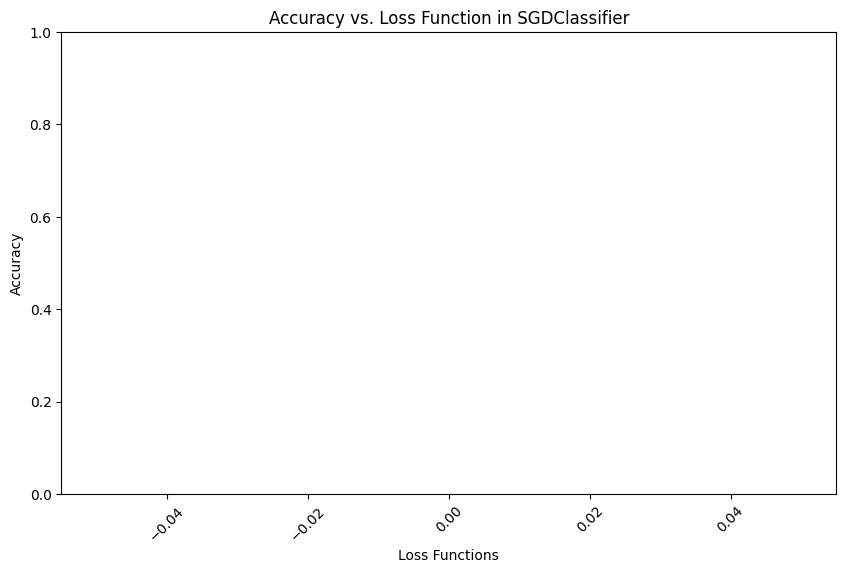

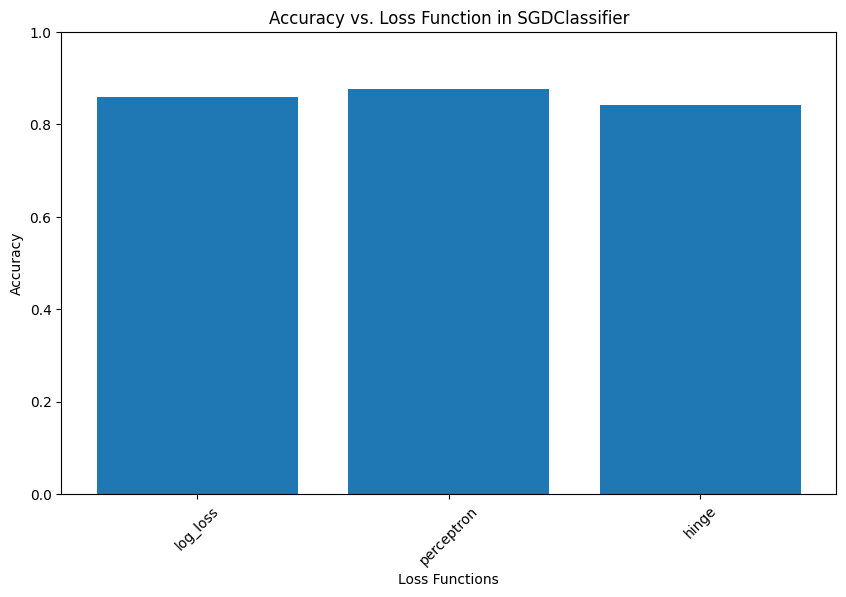

In [23]:
import matplotlib.pyplot as plt

loss_functions = []
acc_list = []

# YOUR CODE HERE


# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(loss_functions, acc_list)
plt.xlabel('Loss Functions')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Loss Function in SGDClassifier')
plt.ylim([0, 1])  # Set y-axis limit for accuracy scale (0 to 1)
plt.xticks(rotation=45)
plt.show()



# EXAMPLE SOLUTION:
loss_functions = ['log_loss', 'perceptron', 'hinge']

acc_list = []

for func in loss_functions:
    # Load the model
    model = SGDClassifier(loss=func, alpha=0.01, max_iter=1000)

    # Fit the model
    model.fit(x_train, y_train)

    # Prediction
    preds = model.predict(x_test)

    # Evaluation metric: Accuracy
    acc = accuracy_score(y_test, preds)
    acc_list.append(acc)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(loss_functions, acc_list)
plt.xlabel('Loss Functions')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Loss Function in SGDClassifier')
plt.ylim([0, 1])  # Set y-axis limit for accuracy scale (0 to 1)
plt.xticks(rotation=45)
plt.show()

## **Graded exercises (5 marks)**

**GQ1. (1 mark) What are the 3 steps within data preparation? Provide a brief description of each.**

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: see data preparation section
1. Data cleaning (i.e., what we did in Week 3: intro to data science; removing invalid values/outliers, etc.)
2. Feature selection (getting rid of features that are not helpful to us)
3. Data splitting (from the big dataset, split into training and test sets using a split ratio)


**GQ2. (2 marks) What are true labels used for during model training?**

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: used to update weights; on each iteration, we can compare the model output with what the actual outcome was, and adjust the model weights accordingly.


**GQ3. (2 marks) In data preparation, we split the data to create a training and test set. What is the test set used for, and why do we not use a training set for this purpose?**

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: model evaluation; need to evaluate trained model on unseen data, or else we cannot really tell how the model will do in a real scenario with new data

## Conclusion

Through this module, we expanded this simplified pipeline...

<img src="ml_pipeline.png" alt="Drawing" style="width: 450px;"/>

... into a slightly more detailed view, with an explanation of what will be produced at each stage and what is required to produce it:

<img src="data_prep_system.png" alt="Drawing" style="width: 650px;"/>
<img src="model_train_system.png" alt="Drawing" style="width: 650px;"/>
<img src="model_eval_system.png" alt="Drawing" style="width: 650px;"/>


This is getting complex and exciting! Next week, we will delve into the model and training stage and highlight how you can use sklearn to do this analysis. 
